In [2]:
from nilearn import datasets, image
import numpy as np
import nibabel as nib

# ----------------------------
# 1. Load Harvard-Oxford atlases
# ----------------------------
cortical = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-1mm')
subcortical = datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr25-1mm')

cort_img = cortical["maps"]
sub_img = subcortical["maps"]

cort_data = cort_img.get_fdata()
sub_data = sub_img.get_fdata()

# ----------------------------
# 2. Find indices for Insula & Amygdala
# ----------------------------
insula_indices = [i for i, lbl in enumerate(cortical.labels) if "Insular" in lbl]
amygdala_indices = [i for i, lbl in enumerate(subcortical.labels) if "Amygdala" in lbl]

print("Insula indices:", insula_indices, [cortical.labels[i] for i in insula_indices])
print("Amygdala indices:", amygdala_indices, [subcortical.labels[i] for i in amygdala_indices])

# ----------------------------
# 3. Create masks
# ----------------------------
insula_mask_data = np.isin(cort_data, insula_indices).astype(int)
amygdala_mask_data = np.isin(sub_data, amygdala_indices).astype(int)

insula_mask_img = image.new_img_like(cort_img, insula_mask_data)
amygdala_mask_img = image.new_img_like(sub_img, amygdala_mask_data)

insula_vox = np.argwhere(insula_mask_data > 0)
amygdala_vox = np.argwhere(amygdala_mask_data > 0)

# 5. Convert voxel coords to MNI mm coords
in_affine = insula_mask_img.affine
insula_mm = nib.affines.apply_affine(in_affine, insula_vox)
am_affine = amygdala_mask_img.affine
amygdala_mm = nib.affines.apply_affine(am_affine, amygdala_vox)

# 6. Convert RAS (nibabel default) to LPI (AFNI default) by flipping x & y
ins_coords_lpi = insula_mm.copy()
ins_coords_lpi[:, 0] *= -1  # flip X
ins_coords_lpi[:, 1] *= -1  # flip Y

amg_coords_lpi = amygdala_mm.copy()
amg_coords_lpi[:, 0] *= -1  # flip X
amg_coords_lpi[:, 1] *= -1  # flip Y


# Save masks to files (NIfTI)
#insula_mask_img.to_filename("insula_mask_HO.nii.gz")
#amygdala_mask_img.to_filename("amygdala_mask_HO.nii.gz")

#print("Saved insula_mask_HO.nii.gz and amygdala_mask_HO.nii.gz")


[fetch_atlas_harvard_oxford] Dataset found in C:\Users\NA\nilearn_data\fsl

[fetch_atlas_harvard_oxford] Dataset found in C:\Users\NA\nilearn_data\fsl

Insula indices: [2] ['Insular Cortex']
Amygdala indices: [10, 20] ['Left Amygdala', 'Right Amygdala']


In [3]:
ins_coords_lpi


array([[ 45.,   4.,   2.],
       [ 45.,   3.,   2.],
       [ 45.,   2.,  -2.],
       ...,
       [-47.,  -5.,  -3.],
       [-47.,  -6.,  -3.],
       [-47.,  -7.,  -3.]])

c:\Users\NA\.conda\envs\eeg_study\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
C:\Users\NA\AppData\Local\Temp\ipykernel_36020\95247329.py:5: UserWarning: Casting data from int32 to float32
  plotting.view_img(amygdala_mask_img, threshold=None)
C:\Users\NA\AppData\Local\Temp\ipykernel_36020\95247329.py:5: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  plotting.view_img(amygdala_mask_img, threshold=None)



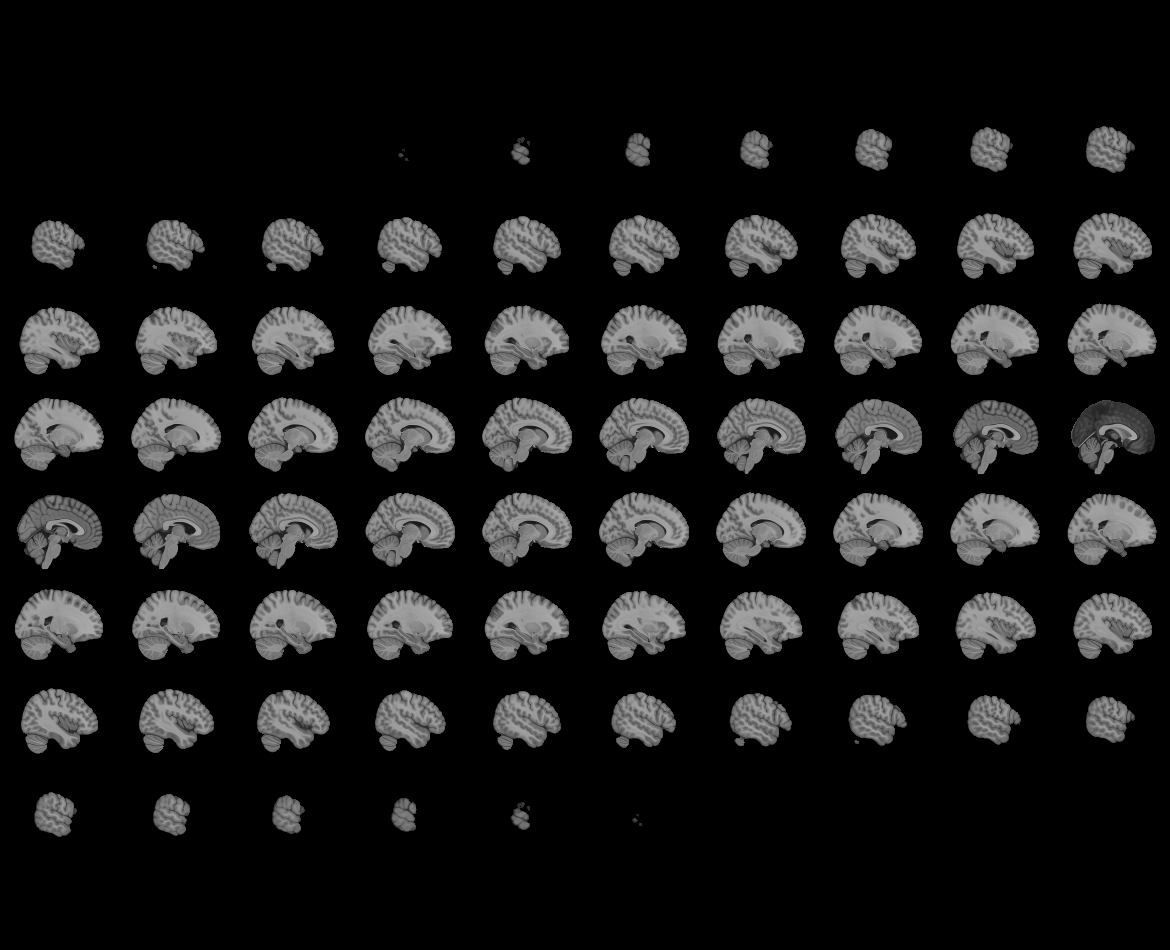
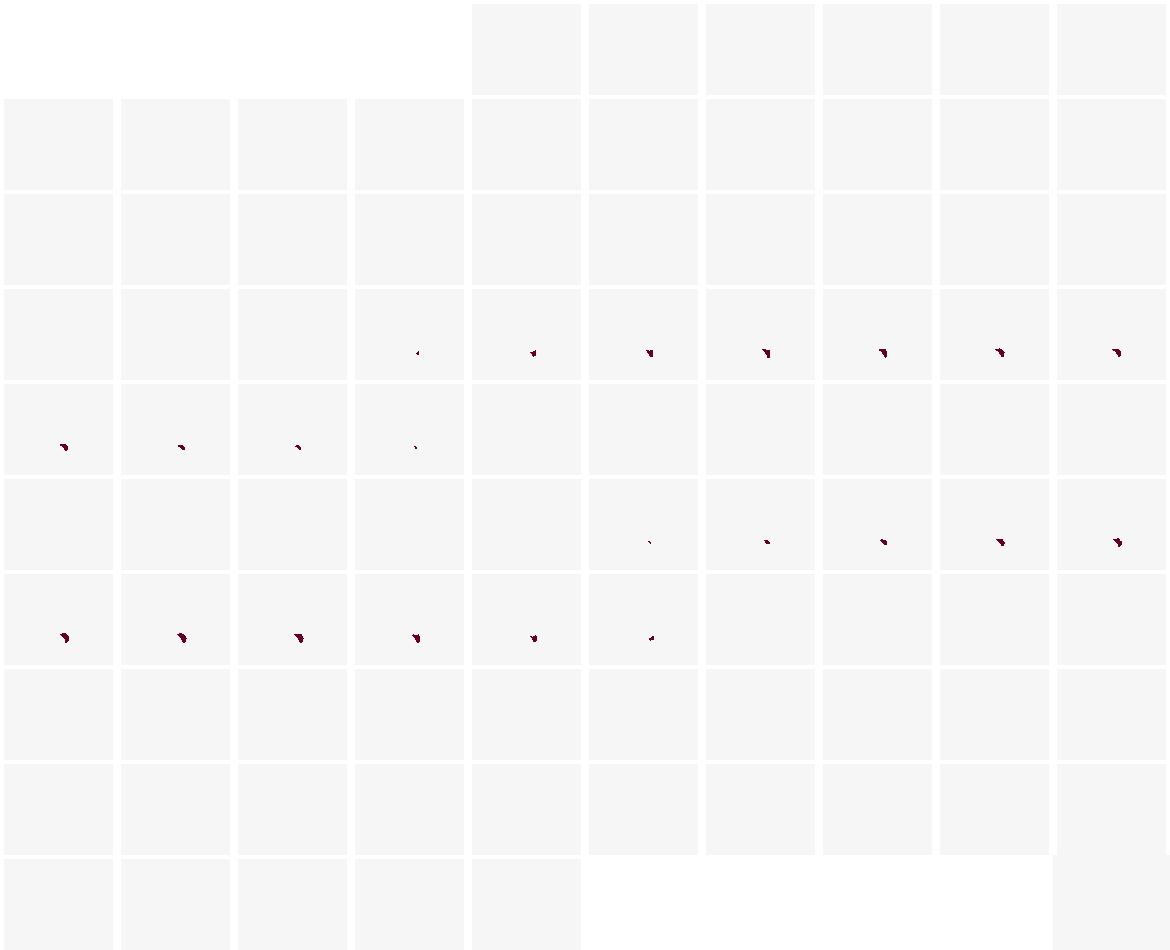

In [4]:
import nibabel as nib
from nilearn import plotting

# Show in interactive HTML viewer
plotting.view_img(amygdala_mask_img, threshold=None)